<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/grafico_lista_ligada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.prev = None

class DoublyLinkedList:
    def __init__(self):
        self.head = None

    def append(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
        else:
            last_node = self.head
            while last_node.next:
                last_node = last_node.next
            last_node.next = new_node
            new_node.prev = last_node

    def print_list(self):
        cur_node = self.head
        while cur_node:
            print(cur_node.data)
            cur_node = cur_node.next

    def visualize_list(self):
      G = nx.DiGraph()
      node_labels = {}

      cur_node = self.head
      while cur_node:
        G.add_node(cur_node.data)
        node_labels[cur_node.data] = str(cur_node.data)
        if cur_node.prev:
            G.add_edge(cur_node.prev.data, cur_node.data)
        if cur_node.next:
            G.add_edge(cur_node.data, cur_node.next.data)
        cur_node = cur_node.next

      pos = nx.spring_layout(G)
      nx.draw(G, pos, with_labels=True, labels=node_labels)
      plt.show()

In [6]:
# Criando uma lista duplamente encadeada
dllist = DoublyLinkedList()

# Adicionando elementos
dllist.append(1)
dllist.append(2)
dllist.append(3)
dllist.append(4)

# Imprimindo a lista
dllist.print_list()

1
2
3
4


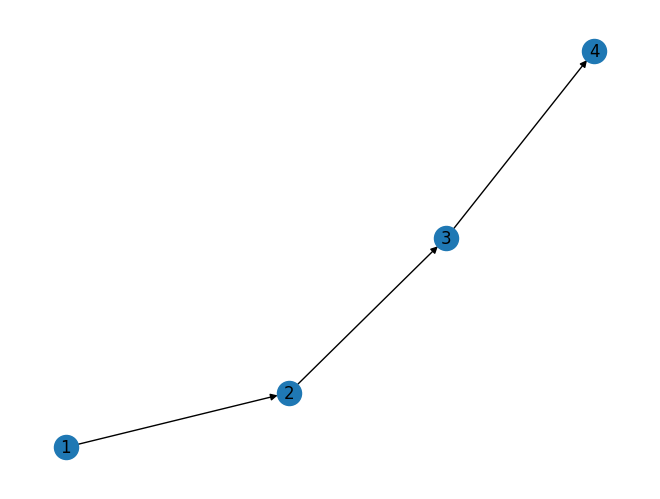

In [7]:
dllist.visualize_list()